In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set() 

In [2]:
news_df = pd.read_csv('bbc.csv', index_col='id')
news_df

,news,type
id,,
0,UK economy facing 'major risks'\n \n The UK ma...,business
1,Aids and climate top Davos agenda\n \n Climate...,business
2,Asian quake hits European shares\n \n Shares i...,business
3,India power shares jump on debut\n \n Shares i...,business
4,Lacroix label bought by US firm\n \n Luxury go...,business
...,...,...
2220,Warning over Windows Word files\n \n Writing a...,tech
2221,Fast lifts rise into record books\n \n Two hig...,tech
2222,Nintendo adds media playing to DS\n \n Nintend...,tech


# Preparation of the text data for analysis

In [3]:
news_df['clean_text'] = news_df.news.apply(lambda x: " ".join(x.lower() for x in x.split())) #transform text to lowercase
news_df.head(10)

,news,type,clean_text
id,,,
0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing 'major risks' the uk manufac...
1,Aids and climate top Davos agenda\n \n Climate...,business,aids and climate top davos agenda climate chan...
2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares in eur...
3,India power shares jump on debut\n \n Shares i...,business,india power shares jump on debut shares in ind...
4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought by us firm luxury goods g...
5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkey-iran mobile deal 'at risk' turkey's inv...
7,Parmalat to return to stockmarket\n \n Parmala...,business,"parmalat to return to stockmarket parmalat, th..."
8,WorldCom director admits lying\n \n The former...,business,worldcom director admits lying the former chie...


In [4]:
news_df['clean_text'] = news_df.clean_text.str.replace(r'[^\w\s]', '')
news_df.head(10)

,news,type,clean_text
id,,,
0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing 'major risks' the uk manufac...
1,Aids and climate top Davos agenda\n \n Climate...,business,aids and climate top davos agenda climate chan...
2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares in eur...
3,India power shares jump on debut\n \n Shares i...,business,india power shares jump on debut shares in ind...
4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought by us firm luxury goods g...
5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkey-iran mobile deal 'at risk' turkey's inv...
7,Parmalat to return to stockmarket\n \n Parmala...,business,"parmalat to return to stockmarket parmalat, th..."
8,WorldCom director admits lying\n \n The former...,business,worldcom director admits lying the former chie...


In [5]:
news_df.clean_text[0]

'uk economy facing \'major risks\' the uk manufacturing sector will continue to face "serious challenges" over the next two years, the british chamber of commerce (bcc) has said. the group\'s quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. the rise came despite exchange rates being cited as a major concern. however, the bcc found the whole uk economy still faced "major risks" and warned that growth is set to slow. it recently forecast economic growth will slow from more than 3% in 2004 to a little below 2.5% in both 2005 and 2006. manufacturers\' domestic sales growth fell back slightly in the quarter, the survey of 5,196 firms found. employment in manufacturing also fell and job expectations were at their lowest level for a year. "despite some positive news for the export sector, there are worrying signs for manufacturing," the bcc said. "these results reinforce our concern over the sector\'s persistent in

### Since the previous code didn't eliminate punctuations, here I wrote another code to remove punctuations.

In [6]:
punctuation = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''

news_df['clean_text'] = news_df['clean_text'].apply(lambda x: ''.join([' ' if char in punctuation else char for char in x]))

In [7]:
news_df.clean_text[0]

'uk economy facing  major risks  the uk manufacturing sector will continue to face  serious challenges  over the next two years  the british chamber of commerce  bcc  has said  the group s quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years  the rise came despite exchange rates being cited as a major concern  however  the bcc found the whole uk economy still faced  major risks  and warned that growth is set to slow  it recently forecast economic growth will slow from more than 3  in 2004 to a little below 2 5  in both 2005 and 2006  manufacturers  domestic sales growth fell back slightly in the quarter  the survey of 5 196 firms found  employment in manufacturing also fell and job expectations were at their lowest level for a year   despite some positive news for the export sector  there are worrying signs for manufacturing   the bcc said   these results reinforce our concern over the sector s persistent inabili

In [8]:
news_df['clean_text'] = news_df.clean_text.str.replace(r'\d+','')
news_df.clean_text[0]

'uk economy facing  major risks  the uk manufacturing sector will continue to face  serious challenges  over the next two years  the british chamber of commerce  bcc  has said  the group s quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years  the rise came despite exchange rates being cited as a major concern  however  the bcc found the whole uk economy still faced  major risks  and warned that growth is set to slow  it recently forecast economic growth will slow from more than 3  in 2004 to a little below 2 5  in both 2005 and 2006  manufacturers  domestic sales growth fell back slightly in the quarter  the survey of 5 196 firms found  employment in manufacturing also fell and job expectations were at their lowest level for a year   despite some positive news for the export sector  there are worrying signs for manufacturing   the bcc said   these results reinforce our concern over the sector s persistent inabili

### Since the previous code didn't eliminate unnecessary numbers, here I wrote another code to remove numbers.

In [9]:
pattern = r'\b\d+\b|\d{4}-\d{2}-\d{2}\b'

news_df['clean_text'] = news_df['clean_text'].str.replace(pattern, '', regex=True)
news_df.clean_text[0]

'uk economy facing  major risks  the uk manufacturing sector will continue to face  serious challenges  over the next two years  the british chamber of commerce  bcc  has said  the group s quarterly survey of companies found exports had picked up in the last three months of  to their best levels in eight years  the rise came despite exchange rates being cited as a major concern  however  the bcc found the whole uk economy still faced  major risks  and warned that growth is set to slow  it recently forecast economic growth will slow from more than   in  to a little below    in both  and   manufacturers  domestic sales growth fell back slightly in the quarter  the survey of   firms found  employment in manufacturing also fell and job expectations were at their lowest level for a year   despite some positive news for the export sector  there are worrying signs for manufacturing   the bcc said   these results reinforce our concern over the sector s persistent inability to sustain recovery 

In [10]:
# Remove common stop words

import nltk
from nltk.corpus import stopwords, words
stop = stopwords.words('english')

news_df['clean_text'] = news_df.clean_text.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
news_df.head(10)

,news,type,clean_text
id,,,
0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks uk manufacturing...
1,Aids and climate top Davos agenda\n \n Climate...,business,aids climate top davos agenda climate change f...
2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares europe...
3,India power shares jump on debut\n \n Shares i...,business,india power shares jump debut shares india lar...
4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought us firm luxury goods grou...
5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkey iran mobile deal risk turkey investment...
7,Parmalat to return to stockmarket\n \n Parmala...,business,parmalat return stockmarket parmalat italian d...
8,WorldCom director admits lying\n \n The former...,business,worldcom director admits lying former chief fi...


# Identify the 10 most frequently used words in the text

In [11]:
words = ' '.join(news_df['clean_text']).lower().split()

In [12]:
fd = nltk.FreqDist(words)
fd.most_common(20)

[('said', 7255),
 ('mr', 3005),
 ('would', 2581),
 ('year', 2309),
 ('also', 2156),
 ('people', 2045),
 ('new', 1978),
 ('us', 1972),
 ('one', 1892),
 ('could', 1511),
 ('last', 1394),
 ('first', 1355),
 ('time', 1322),
 ('two', 1282),
 ('world', 1201),
 ('government', 1160),
 ('uk', 1115),
 ('years', 1003),
 ('best', 974),
 ('make', 945)]

#  Ten least frequently used words

In [13]:
least_frequent_words = sorted(fd, key=fd.get)[:10]
print("Least frequent words:")
for word in least_frequent_words:
    print(word, ":", fd[word])

Least frequent words:
decelerate : 1
converge : 1
wrought : 1
reisurance : 1
goetti : 1
tui : 1
mediterranne : 1
dax : 1
cac : 1
floiran : 1


Here we tokenize and lemmatize the text

In [14]:
tokens = ' '.join(news_df.clean_text).split()
tokens[:200]

['uk',
 'economy',
 'facing',
 'major',
 'risks',
 'uk',
 'manufacturing',
 'sector',
 'continue',
 'face',
 'serious',
 'challenges',
 'next',
 'two',
 'years',
 'british',
 'chamber',
 'commerce',
 'bcc',
 'said',
 'group',
 'quarterly',
 'survey',
 'companies',
 'found',
 'exports',
 'picked',
 'last',
 'three',
 'months',
 'best',
 'levels',
 'eight',
 'years',
 'rise',
 'came',
 'despite',
 'exchange',
 'rates',
 'cited',
 'major',
 'concern',
 'however',
 'bcc',
 'found',
 'whole',
 'uk',
 'economy',
 'still',
 'faced',
 'major',
 'risks',
 'warned',
 'growth',
 'set',
 'slow',
 'recently',
 'forecast',
 'economic',
 'growth',
 'slow',
 'little',
 'manufacturers',
 'domestic',
 'sales',
 'growth',
 'fell',
 'back',
 'slightly',
 'quarter',
 'survey',
 'firms',
 'found',
 'employment',
 'manufacturing',
 'also',
 'fell',
 'job',
 'expectations',
 'lowest',
 'level',
 'year',
 'despite',
 'positive',
 'news',
 'export',
 'sector',
 'worrying',
 'signs',
 'manufacturing',
 'bcc',
 '

In [15]:
print(len(tokens))

488826


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [17]:
news_df['clean_text'] = news_df.clean_text.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
news_df.head(10)

,news,type,clean_text
id,,,
0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risk uk manufacturing ...
1,Aids and climate top Davos agenda\n \n Climate...,business,aid climate top davos agenda climate change fi...
2,Asian quake hits European shares\n \n Shares i...,business,asian quake hit european share share europe le...
3,India power shares jump on debut\n \n Shares i...,business,india power share jump debut share india large...
4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought u firm luxury good group ...
5,Insurance bosses plead guilty\n \n Another thr...,business,insurance boss plead guilty another three u in...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkey iran mobile deal risk turkey investment...
7,Parmalat to return to stockmarket\n \n Parmala...,business,parmalat return stockmarket parmalat italian d...
8,WorldCom director admits lying\n \n The former...,business,worldcom director admits lying former chief fi...


# How does lemmatization change the most/least frequent words

Lemmatization converts the word into its root word which allows us to group similar words. In our example, lemmatization added more counts to some words like "year". However, it also created some incomprehensible single character words.

In [18]:
words = ' '.join(news_df['clean_text']).lower().split()
fd = nltk.FreqDist(words)
fd.most_common(20)

[('said', 7255),
 ('year', 3312),
 ('mr', 3046),
 ('would', 2581),
 ('also', 2156),
 ('people', 2046),
 ('u', 1986),
 ('new', 1978),
 ('one', 1938),
 ('time', 1627),
 ('could', 1511),
 ('game', 1493),
 ('last', 1394),
 ('first', 1356),
 ('two', 1282),
 ('say', 1269),
 ('world', 1229),
 ('government', 1196),
 ('film', 1148),
 ('uk', 1115)]

In [19]:
least_frequent_words = sorted(fd, key=fd.get)[:10]
print("Least frequent words:")
for word in least_frequent_words:
    print(word, ":", fd[word])

Least frequent words:
decelerate : 1
converge : 1
wrought : 1
reisurance : 1
goetti : 1
tui : 1
mediterranne : 1
dax : 1
cac : 1
floiran : 1


Here, we eliminated the single character words.

In [20]:
news_df['clean_text'] = news_df.clean_text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))
words = ' '.join(news_df['clean_text']).lower().split()
fd = nltk.FreqDist(words)
fd.most_common(20)

[('said', 7255),
 ('year', 3312),
 ('mr', 3046),
 ('would', 2581),
 ('also', 2156),
 ('people', 2046),
 ('new', 1978),
 ('one', 1938),
 ('time', 1627),
 ('could', 1511),
 ('game', 1493),
 ('last', 1394),
 ('first', 1356),
 ('two', 1282),
 ('say', 1269),
 ('world', 1229),
 ('government', 1196),
 ('film', 1148),
 ('uk', 1115),
 ('company', 1114)]

# Generate a world cloud for the text

In [21]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(fd)

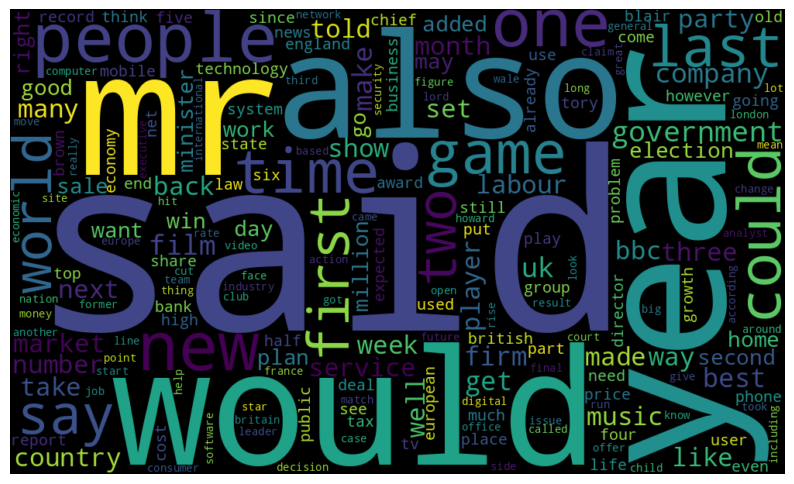

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Demonstrate the generation of n-grams and part of speech tagging

In [23]:
tokens = ' '.join(news_df.clean_text).split()

In [24]:
ngrams_2 = nltk.bigrams(tokens)

freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('last', 'year'), 501),
 (('said', 'mr'), 363),
 (('told', 'bbc'), 362),
 (('year', 'old'), 341),
 (('mr', 'blair'), 335),
 (('prime', 'minister'), 321),
 (('mr', 'brown'), 256),
 (('chief', 'executive'), 208),
 (('said', 'would'), 192),
 (('last', 'week'), 188),
 (('tony', 'blair'), 186),
 (('mobile', 'phone'), 183),
 (('bbc', 'news'), 178),
 (('general', 'election'), 177),
 (('new', 'york'), 174),
 (('six', 'nation'), 163),
 (('year', 'ago'), 162),
 (('mr', 'howard'), 160),
 (('liberal', 'democrat'), 157),
 (('first', 'time'), 153)]

We can see the trigrams contain much more information than bigrams or unigrams.

In [25]:
ngrams_3 = nltk.trigrams(tokens)

freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('told', 'bbc', 'news'), 147),
 (('bbc', 'news', 'website'), 97),
 (('told', 'bbc', 'radio'), 76),
 (('leader', 'michael', 'howard'), 58),
 (('mr', 'kilroy', 'silk'), 57),
 (('mr', 'blair', 'said'), 54),
 (('million', 'dollar', 'baby'), 53),
 (('radio', 'today', 'programme'), 49),
 (('told', 'bbc', 'sport'), 48),
 (('bbc', 'radio', 'today'), 47),
 (('tory', 'leader', 'michael'), 41),
 (('mr', 'howard', 'said'), 41),
 (('next', 'general', 'election'), 39),
 (('chancellor', 'gordon', 'brown'), 33),
 (('prime', 'minister', 'tony'), 32),
 (('leader', 'charles', 'kennedy'), 32),
 (('minister', 'tony', 'blair'), 32),
 (('digital', 'music', 'player'), 30),
 (('two', 'year', 'ago'), 28),
 (('world', 'number', 'one'), 27)]

In [ ]:
from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')

pos_tags = pos_tag(tokens)
pos_tags[:20]

In [27]:
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])

Counter({'NN': 231149,
         'JJ': 92005,
         'VBD': 34400,
         'RB': 23541,
         'VBG': 19920,
         'VBP': 13651,
         'VBN': 13318,
         'VB': 10912,
         'CD': 9955,
         'NNS': 9662,
         'IN': 7883,
         'MD': 5387,
         'VBZ': 3013,
         'JJS': 2483,
         'JJR': 1808,
         'NNP': 1246,
         'RBR': 1043,
         'FW': 955,
         'DT': 818,
         'RP': 375,
         'CC': 295,
         'RBS': 148,
         'WP$': 123,
         'PRP': 120,
         'WP': 61,
         'WDT': 58,
         'WRB': 45,
         '$': 18,
         'PRP$': 15,
         'UH': 8,
         'PDT': 5,
         'POS': 4,
         'NNPS': 4,
         'EX': 2,
         'TO': 2})

# Create a Topic model of the text

In [28]:
lem_ls = list(news_df.clean_text.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['uk', 'economy', 'facing', 'major', 'risk', 'uk', 'manufacturing', 'sector', 'continue', 'face', 'serious', 'challenge', 'next', 'two', 'year', 'british', 'chamber', 'commerce', 'bcc', 'said', 'group', 'quarterly', 'survey', 'company', 'found', 'export', 'picked', 'last', 'three', 'month', 'best', 'level', 'eight', 'year', 'rise', 'came', 'despite', 'exchange', 'rate', 'cited', 'major', 'concern', 'however', 'bcc', 'found', 'whole', 'uk', 'economy', 'still', 'faced', 'major', 'risk', 'warned', 'growth', 'set', 'slow', 'recently', 'forecast', 'economic', 'growth', 'slow', 'little', 'manufacturer', 'domestic', 'sale', 'growth', 'fell', 'back', 'slightly', 'quarter', 'survey', 'firm', 'found', 'employment', 'manufacturing', 'also', 'fell', 'job', 'expectation', 'lowest', 'level', 'year', 'despite', 'positive', 'news', 'export', 'sector', 'worrying', 'sign', 'manufacturing', 'bcc', 'said', 'result', 'reinforce', 'concern', 'sector', 'persistent', 'inability', 'sustain', 'recovery', 'outl

In [29]:
import gensim
import gensim.corpora as corpora

In [30]:
id2word = corpora.Dictionary(lem_ls)

corpus = [id2word.doc2bow(post) for post in lem_ls]

Here we just randomly chose num_topics to be 20, and evaluate the accuracy. 

In [31]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [32]:
print(lda_model.print_topics())

[(0, '0.013*"year" + 0.009*"said" + 0.006*"world" + 0.005*"new" + 0.005*"would" + 0.004*"film" + 0.004*"one" + 0.004*"time" + 0.004*"could" + 0.004*"people"'), (1, '0.019*"said" + 0.013*"year" + 0.007*"market" + 0.007*"growth" + 0.007*"economy" + 0.007*"price" + 0.007*"sale" + 0.007*"bank" + 0.006*"rate" + 0.006*"month"'), (2, '0.010*"said" + 0.008*"year" + 0.006*"new" + 0.005*"wage" + 0.005*"government" + 0.005*"would" + 0.005*"country" + 0.005*"job" + 0.005*"also" + 0.005*"mr"'), (3, '0.021*"said" + 0.009*"lord" + 0.008*"government" + 0.008*"would" + 0.007*"mr" + 0.007*"minister" + 0.007*"bill" + 0.005*"could" + 0.005*"say" + 0.004*"tax"'), (4, '0.018*"said" + 0.008*"people" + 0.007*"would" + 0.006*"hunting" + 0.006*"hunt" + 0.005*"call" + 0.005*"say" + 0.005*"law" + 0.004*"new" + 0.004*"system"'), (5, '0.021*"game" + 0.013*"said" + 0.006*"people" + 0.006*"one" + 0.005*"kilroy" + 0.004*"time" + 0.004*"new" + 0.004*"silk" + 0.004*"could" + 0.004*"ukip"'), (6, '0.008*"said" + 0.006*"cl

The numeric values in front of each word reflects the importance of that word within the topic. the first topic seems to be related to general news topics if we look at the output [(0, '0.013*"year" + 0.009*"said" + 0.006*"world" + 0.005*"new" + 0.005*"would" + 0.004*"film" + 0.004*"one" + 0.004*"time" + 0.004*"could" + 0.004*"people"').

# Test the accuracy of your model

Our randomly guessed model didn't perform well with only 0.43 coherence score. Therefore, we'll find the optimal number of topics in the next section.

In [33]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=lem_ls, 
                                     dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.41488611127743125


# Find the optimal number of topics

We choose our first number of topics to be 20 because usually higher number of topics result in greater coherence score. However, our model didn't perform well, so we're finding the optimal number of topics in the range between 2 to 30.

In [34]:
scores = []
for i in range(2,30):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))

Calcuting for 2 topics
Calcuting for 3 topics
Calcuting for 4 topics
Calcuting for 5 topics
Calcuting for 6 topics
Calcuting for 7 topics
Calcuting for 8 topics
Calcuting for 9 topics
Calcuting for 10 topics
Calcuting for 11 topics
Calcuting for 12 topics
Calcuting for 13 topics
Calcuting for 14 topics
Calcuting for 15 topics
Calcuting for 16 topics
Calcuting for 17 topics
Calcuting for 18 topics
Calcuting for 19 topics
Calcuting for 20 topics
Calcuting for 21 topics
Calcuting for 22 topics
Calcuting for 23 topics
Calcuting for 24 topics
Calcuting for 25 topics
Calcuting for 26 topics
Calcuting for 27 topics
Calcuting for 28 topics
Calcuting for 29 topics


In [35]:
scores

[(2, 0.2799074466385863),
 (3, 0.29054806806363775),
 (4, 0.2982268380849666),
 (5, 0.3386894347727204),
 (6, 0.37548618820441665),
 (7, 0.4154596699501507),
 (8, 0.3901295546845648),
 (9, 0.41080223572305496),
 (10, 0.4339569265055374),
 (11, 0.4307533897670386),
 (12, 0.4443156702624551),
 (13, 0.4650091338980262),
 (14, 0.44581949058948295),
 (15, 0.43599739226015993),
 (16, 0.45054588560853537),
 (17, 0.421730879721414),
 (18, 0.43911186789714995),
 (19, 0.4362236690517882),
 (20, 0.41307529462363224),
 (21, 0.4281543992248781),
 (22, 0.41838117147611525),
 (23, 0.4359149071102855),
 (24, 0.4372903767366563),
 (25, 0.4166247392312481),
 (26, 0.42258472934847113),
 (27, 0.4355692548519691),
 (28, 0.42331653810021297),
 (29, 0.4309315444236503)]

13 is the most number of topic.

In [36]:
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=13, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Print the topics and explain any insights at this point

In [37]:
print(bf_lda_model.print_topics())

[(0, '0.011*"year" + 0.010*"said" + 0.008*"tv" + 0.007*"show" + 0.007*"technology" + 0.006*"people" + 0.006*"new" + 0.005*"also" + 0.004*"one" + 0.004*"would"'), (1, '0.018*"said" + 0.011*"year" + 0.007*"market" + 0.006*"bank" + 0.005*"growth" + 0.005*"price" + 0.005*"company" + 0.005*"sale" + 0.005*"economy" + 0.005*"month"'), (2, '0.010*"said" + 0.007*"mr" + 0.007*"year" + 0.006*"people" + 0.005*"service" + 0.005*"would" + 0.005*"new" + 0.004*"one" + 0.004*"wage" + 0.004*"also"'), (3, '0.026*"mr" + 0.020*"said" + 0.014*"election" + 0.013*"labour" + 0.011*"blair" + 0.011*"party" + 0.011*"would" + 0.009*"minister" + 0.009*"brown" + 0.008*"government"'), (4, '0.018*"said" + 0.007*"would" + 0.006*"people" + 0.005*"mr" + 0.005*"say" + 0.005*"company" + 0.005*"yukos" + 0.004*"court" + 0.004*"law" + 0.004*"legal"'), (5, '0.017*"game" + 0.012*"said" + 0.006*"people" + 0.005*"one" + 0.005*"time" + 0.004*"play" + 0.004*"first" + 0.004*"get" + 0.003*"year" + 0.003*"could"'), (6, '0.009*"said" +

This topic modeling output reveals several insights into the underlying themes present in the text data:

Television and Technology: Topic 0 suggests a focus on television, technology, and entertainment, with words like "tv," "show," and "technology" being prominent.

Economy and Market: Topic 1 indicates a focus on economic matters, including market dynamics, banking, and economic growth.

Public Service and Employment: Topic 2 suggests discussions related to public service, employment, and wages.

Political Elections: Topic 3 revolves around political elections, with mentions of political figures like "Mr. Blair" and "Mr. Brown."

Legal Affairs: Topic 4 involves legal matters, including court cases and legal entities like "Yukos."

Gaming and Entertainment: Topic 5 centers on gaming and entertainment, with words like "game," "play," and "first" being prominent.

Sports: Topic 6 and Topic 7 focus on sports, with mentions of teams like "England" and "Wales" along with general sports-related terms.

Mobile Technology and Music: Topic 8 suggests discussions related to mobile technology, phones, and music.

Film Industry: Topic 9 focuses on the film industry, including discussions about films, actors, and awards like the "Oscar."

Government Policies: Topic 10 involves discussions about government policies and plans.

Computer Security and Software: Topic 11 revolves around computer security, viruses, and software.

Music and Awards: Topic 12 indicates discussions related to music, awards, and bands.


# Graph the topics

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(bf_lda_model, corpus, id2word)

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'topic_model_viz.html')